<a href="https://colab.research.google.com/github/Chrisdoan9/Chrisdoan9/blob/master/single_cell_mtx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip install scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 28.8 MB/s 
     |████████████████████████████████| 11.2 MB 11.3 MB/s 
     |████████████████████████████████| 96 kB 2.3 MB/s 
     |████████████████████████████████| 88 kB 6.9 MB/s 
     |████████████████████████████████| 965 kB 61.3 MB/s 
     |████████████████████████████████| 1.1 MB 61.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=e1c35db7935ee0afa99bcbec09d26360bbf0ca3d800158cfa1fb02f16f9120cd
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=985f441abab097dadd8ae24f4cdc3910ae8baf05b4ec738e858964dd6570709b
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6

In [ ]:
import scanpy as sc

In [ ]:
ls

NC/  sample_data/  VV/


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving barcodes.tsv.gz to barcodes.tsv.gz
Saving features.tsv.gz to features.tsv.gz
Saving matrix.mtx.gz to matrix.mtx.gz


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving barcodes.tsv.gz to barcodes.tsv.gz
Saving features.tsv.gz to features.tsv.gz
Saving matrix.mtx.gz to matrix.mtx.gz


In [ ]:
cd /root/NC/

[Errno 2] No such file or directory: '/root/NC/'
/content


In [ ]:
pwd

'/content'

In [ ]:
!mkdir NC

In [ ]:
!mkdir VV

In [ ]:
!mkdir filtered_feature_bc_matrix

In [ ]:
!mv *.gz /content/NC/

In [ ]:
!mv *.gz /content/VV/

In [ ]:
adataNC = sc.read_10x_mtx(
    '/content/NC/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)

In [ ]:
adataNC

AnnData object with n_obs × n_vars = 19760 × 36601
    var: 'gene_ids', 'feature_types'

In [ ]:

!pip install scvi-tools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 34.8 MB/s 
     |████████████████████████████████| 145 kB 72.2 MB/s 
     |████████████████████████████████| 529 kB 61.7 MB/s 
     |████████████████████████████████| 722 kB 69.6 MB/s 
     |████████████████████████████████| 292 kB 76.8 MB/s 
     |████████████████████████████████| 77 kB 7.1 MB/s 
     |████████████████████████████████| 708 kB 69.4 MB/s 
     |████████████████████████████████| 237 kB 71.7 MB/s 
     |████████████████████████████████| 185 kB 75.1 MB/s 
     |████████████████████████████████| 51 kB 7.7 MB/s 
     |████████████████████████████████| 1.6 MB 60.2 MB/s 
     |████████████████████████████████| 85 kB 3.9 MB/s 
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19896 sha256=4cb8f486c0300946aa18d030b884824043c240e9efdad657a3f9bf7d3d1b0250
  Stored in directory: /root/.cache/pip/wheels/4b/a1/89/8c863

In [ ]:
import scvi

INFO:pytorch_lightning.utilities.seed:Global seed set to 0
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:54: LightningDeprecationWarning: pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6 and will be removed in v1.8. Use the equivalent function from the pytorch_lightning.utilities.rank_zero module instead.
  "pytorch_lightning.utilities.warnings.rank_zero_deprecation has been deprecated in v1.6"
/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/warnings.py:58: LightningDeprecationWarning: The `pytorch_lightning.loggers.base.rank_zero_experiment` is deprecated in v1.7 and will be removed in v1.9. Please use `pytorch_lightning.loggers.logger.rank_zero_experiment` instead.
  return new_rank_zero_deprecation(*args, **kwargs)


In [ ]:
adataNC

AnnData object with n_obs × n_vars = 14035 × 2000
    obs: '_scvi_batch', '_scvi_labels', 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'leiden'
    var: 'gene_ids', 'feature_types', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', '_scvi_uuid', '_scvi_manager_uuid', 'log1p', 'pca', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
adataNC.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression
AC007325.4,ENSG00000278817,Gene Expression


In [ ]:
'CD3E' in adataNC.var_names

True

In [ ]:
adataNC.obs

""
AAACCCACAAAGGGCT-1
AAACCCACAAGGAGTC-1
AAACCCACAAGGTACG-1
AAACCCACACCTCGTT-1
AAACCCACATCATCCC-1
...
TTTGTTGGTGAAAGTT-1
TTTGTTGGTGGTAACG-1
TTTGTTGTCACGAGGA-1
TTTGTTGTCCAAAGGG-1


In [ ]:
sc.pp.filter_genes(adataNC, min_cells = 10)

In [ ]:
!pip install scikit-misc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 8.8 MB 10.4 MB/s 


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!pip uninstall scikit-misc

Found existing installation: scikit-misc 0.1.4
Uninstalling scikit-misc-0.1.4:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_misc-0.1.4.dist-info/*
    /usr/local/lib/python3.7/dist-packages/scikit_misc.libs/libgfortran-ed201abd.so.3.0.0
    /usr/local/lib/python3.7/dist-packages/scikit_misc.libs/libopenblasp-r0-085ca80a.3.9.so
    /usr/local/lib/python3.7/dist-packages/skmisc/*
Proceed (y/n)? n


In [ ]:
sc.pp.highly_variable_genes(adataNC, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [ ]:
scvi.model.SCVI.setup_anndata(adataNC)
vae = scvi.model.SCVI(adataNC)
vae.train()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [09:48<00:00,  1.43s/it, loss=673, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [09:48<00:00,  1.47s/it, loss=673, v_num=1]


In [ ]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 163/400:  41%|████      | 163/400 [04:22<06:21,  1.61s/it, loss=0.211, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.216. Signaling Trainer to stop.


In [ ]:
df = solo.predict()
df['prediction'] = solo.predict(soft = False)

df.index = df.index.map(lambda x: x[:-2])

df

,doublet,singlet,prediction
AAACCCACAAAGGGCT-1,-5.722234,5.266356,singlet
AAACCCACAAGGAGTC-1,-0.762363,0.332721,singlet
AAACCCACAAGGTACG-1,-1.195753,1.327977,singlet
AAACCCACACCTCGTT-1,0.009392,-0.508196,doublet
AAACCCACATCATCCC-1,-2.064047,1.373224,singlet
...,...,...,...
TTTGTTGGTGAAAGTT-1,-2.800247,1.977436,singlet
TTTGTTGGTGGTAACG-1,-3.063436,2.589970,singlet
TTTGTTGTCACGAGGA-1,-5.830378,5.314353,singlet
TTTGTTGTCCAAAGGG-1,-0.691599,0.635142,singlet


In [ ]:
df.groupby('prediction').count()

,doublet,singlet
prediction,,
doublet,3226,3226
singlet,16534,16534


In [ ]:
df['dif'] = df.doublet - df.singlet
df

,doublet,singlet,prediction,dif
AAACCCACAAAGGGCT-1,-5.722234,5.266356,singlet,-10.988590
AAACCCACAAGGAGTC-1,-0.762363,0.332721,singlet,-1.095084
AAACCCACAAGGTACG-1,-1.195753,1.327977,singlet,-2.523730
AAACCCACACCTCGTT-1,0.009392,-0.508196,doublet,0.517588
AAACCCACATCATCCC-1,-2.064047,1.373224,singlet,-3.437270
...,...,...,...,...
TTTGTTGGTGAAAGTT-1,-2.800247,1.977436,singlet,-4.777683
TTTGTTGGTGGTAACG-1,-3.063436,2.589970,singlet,-5.653406
TTTGTTGTCACGAGGA-1,-5.830378,5.314353,singlet,-11.144731
TTTGTTGTCCAAAGGG-1,-0.691599,0.635142,singlet,-1.326741


In [ ]:
import seaborn as sns

In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 42.0 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


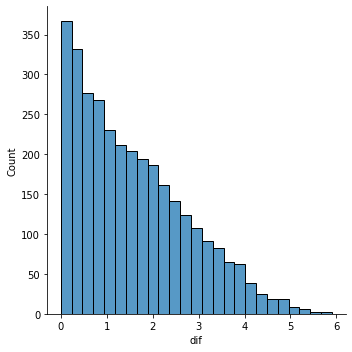

In [ ]:
sns.displot(df[df.prediction == 'doublet'], x = 'dif')

In [ ]:
doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
doublets

,doublet,singlet,prediction,dif
AAACCCAGTATATGGA-1,1.141827,-1.023993,doublet,2.165820
AAACCCATCATGGGAG-1,1.407831,-1.621258,doublet,3.029089
AAACGAAAGAGACAAG-1,0.665837,-1.260584,doublet,1.926421
AAACGAACAGAGTGTG-1,1.379847,-1.616693,doublet,2.996540
AAACGAATCATCCCGT-1,0.986558,-1.453451,doublet,2.440010
...,...,...,...,...
TTTCGATGTCTTTCAT-1,1.116417,-1.214361,doublet,2.330778
TTTCGATTCTCTTCAA-1,0.967206,-1.230466,doublet,2.197672
TTTGACTAGCTGCCTG-1,0.888944,-1.389725,doublet,2.278669
TTTGATCGTCGGAACA-1,0.683102,-1.113206,doublet,1.796308


In [ ]:
adataVV = sc.read_10x_mtx(
    '/root/VV/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)

In [ ]:
adataVV

AnnData object with n_obs × n_vars = 6705 × 36601
    var: 'gene_ids', 'feature_types'

In [ ]:
adataVV.var

,gene_ids,feature_types
MIR1302-2HG,ENSG00000243485,Gene Expression
FAM138A,ENSG00000237613,Gene Expression
OR4F5,ENSG00000186092,Gene Expression
AL627309.1,ENSG00000238009,Gene Expression
AL627309.3,ENSG00000239945,Gene Expression
...,...,...
AC141272.1,ENSG00000277836,Gene Expression
AC023491.2,ENSG00000278633,Gene Expression
AC007325.1,ENSG00000276017,Gene Expression
AC007325.4,ENSG00000278817,Gene Expression


In [ ]:
adataNC.obs['doublet'] = adataNC.obs.index.isin(doublets.index)

In [ ]:
adataNC.obs

,_scvi_batch,_scvi_labels,doublet
AAACCCACAAAGGGCT-1,0,0,False
AAACCCACAAGGAGTC-1,0,0,False
AAACCCACAAGGTACG-1,0,0,False
AAACCCACACCTCGTT-1,0,0,False
AAACCCACATCATCCC-1,0,0,False
...,...,...,...
TTTGTTGGTGAAAGTT-1,0,0,False
TTTGTTGGTGGTAACG-1,0,0,False
TTTGTTGTCACGAGGA-1,0,0,False
TTTGTTGTCCAAAGGG-1,0,0,False


In [ ]:
adataNC = adataNC[~adataNC.obs.doublet]

In [ ]:
adataNC.var['mt'] = adataNC.var.index.str.startswith('MT-')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.


In [ ]:
import pandas as pd

In [ ]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

,0
0,FAU
1,MRPL13
2,RPL10
3,RPL10A
4,RPL10L
...,...
83,RPS9
84,RPSA
85,RSL24D1
86,RSL24D1P11


In [ ]:
adataNC.var['ribo'] = adataNC.var_names.isin(ribo_genes[0].values)

In [ ]:
sc.pp.calculate_qc_metrics(adataNC, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)

In [ ]:
adataNC.var.sort_values('n_cells_by_counts')

,gene_ids,feature_types,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL590677.1,ENSG00000227175,Gene Expression,10,True,956.0,0.000607,0.000911,1.445605,False,False,4,0.000224,99.977576,4.0
LINGO1-AS2,ENSG00000259281,Gene Expression,13,True,1320.0,0.000759,0.001062,1.333431,False,False,7,0.000392,99.960758,7.0
FOXQ1,ENSG00000164379,Gene Expression,11,True,1189.0,0.000709,0.001012,1.365321,False,False,7,0.000561,99.960758,10.0
AC055716.3,ENSG00000257700,Gene Expression,11,True,1187.0,0.000709,0.001012,1.365321,False,False,7,0.000505,99.960758,9.0
OR6C76,ENSG00000185821,Gene Expression,10,True,959.0,0.000607,0.000911,1.445605,False,False,7,0.000392,99.960758,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDE4D,ENSG00000113448,Gene Expression,12297,True,234.0,4.578138,128.931492,2.120185,False,False,10710,4.129331,39.959637,73659.0
MT-ATP6,ENSG00000198899,Gene Expression,12839,True,258.0,1.932439,25.300208,2.062346,True,False,11294,1.789606,36.685727,31923.0
AC105402.3,ENSG00000231079,Gene Expression,13003,True,101.0,1.954656,33.260457,2.656339,False,False,11492,1.843985,35.575737,32893.0
MT-CO3,ENSG00000198938,Gene Expression,13857,True,653.0,2.134413,23.328154,1.590655,True,False,12200,1.974324,31.606682,35218.0


In [ ]:
sc.pp.filter_genes(adataNC, min_cells=3)

In [ ]:
adataNC.var.sort_values('n_cells_by_counts')

,gene_ids,feature_types,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
AL590677.1,ENSG00000227175,Gene Expression,4,True,956.0,0.000607,0.000911,1.445605,False,False,4,0.000224,99.977576,4.0
LINGO1-AS2,ENSG00000259281,Gene Expression,7,True,1320.0,0.000759,0.001062,1.333431,False,False,7,0.000392,99.960758,7.0
FOXQ1,ENSG00000164379,Gene Expression,7,True,1189.0,0.000709,0.001012,1.365321,False,False,7,0.000561,99.960758,10.0
AC055716.3,ENSG00000257700,Gene Expression,7,True,1187.0,0.000709,0.001012,1.365321,False,False,7,0.000505,99.960758,9.0
OR6C76,ENSG00000185821,Gene Expression,7,True,959.0,0.000607,0.000911,1.445605,False,False,7,0.000392,99.960758,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PDE4D,ENSG00000113448,Gene Expression,10710,True,234.0,4.578138,128.931492,2.120185,False,False,10710,4.129331,39.959637,73659.0
MT-ATP6,ENSG00000198899,Gene Expression,11294,True,258.0,1.932439,25.300208,2.062346,True,False,11294,1.789606,36.685727,31923.0
AC105402.3,ENSG00000231079,Gene Expression,11492,True,101.0,1.954656,33.260457,2.656339,False,False,11492,1.843985,35.575737,32893.0
MT-CO3,ENSG00000198938,Gene Expression,12200,True,653.0,2.134413,23.328154,1.590655,True,False,12200,1.974324,31.606682,35218.0


In [ ]:
adataNC.obs.sort_values('n_genes_by_counts')

,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
TCACATTTCCCAGTGG-1,0,0,False,45,50.0,3.0,6.000000,1.0,2.000000
TTGGTTTGTCGAACAG-1,0,0,False,49,82.0,2.0,2.439024,1.0,1.219512
AAGTCGTTCGAGTGGA-1,0,0,False,51,58.0,6.0,10.344828,3.0,5.172414
GTGGGAAAGCGTGAAC-1,0,0,False,52,85.0,4.0,4.705883,0.0,0.000000
ACAACCATCGGTGAAG-1,0,0,False,54,104.0,6.0,5.769231,4.0,3.846154
...,...,...,...,...,...,...,...,...,...
CCTATCGTCAGGGTAG-1,0,0,False,623,6046.0,789.0,13.049950,60.0,0.992392
TCATTCAGTACTCCCT-1,0,0,False,623,1104.0,12.0,1.086957,4.0,0.362319
CAACAGTGTGGTGATG-1,0,0,False,624,4141.0,342.0,8.258875,26.0,0.627868
TAGGTTGCAAGGCTTT-1,0,0,False,631,2671.0,8.0,0.299513,3.0,0.112317


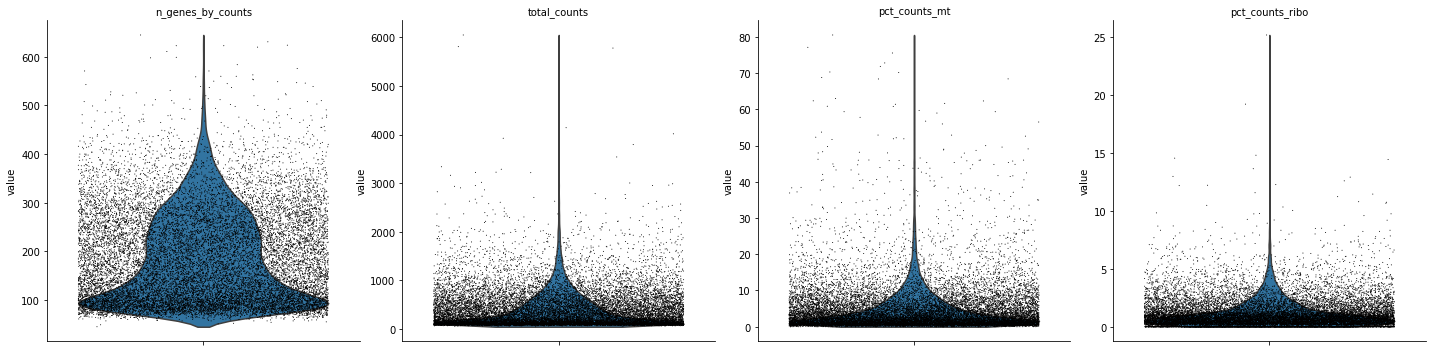

In [ ]:
sc.pl.violin(adataNC, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo'], 
             jitter=0.4, multi_panel=True)

In [ ]:
import numpy as np

In [ ]:
upper_lim = np.quantile(adataNC.obs.n_genes_by_counts.values, .98)

In [ ]:
upper_lim

402.2599999999984

In [ ]:
adataNC = adataNC[adataNC.obs.n_genes_by_counts < upper_lim]

In [ ]:
adataNC.obs

,_scvi_batch,_scvi_labels,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
AAACCCACAAAGGGCT-1,0,0,False,90,100.0,0.0,0.000000,0.0,0.000000
AAACCCACAAGGAGTC-1,0,0,False,185,318.0,24.0,7.547170,4.0,1.257862
AAACCCACAAGGTACG-1,0,0,False,242,531.0,4.0,0.753296,7.0,1.318267
AAACCCACACCTCGTT-1,0,0,False,243,590.0,9.0,1.525424,3.0,0.508475
AAACCCACATCATCCC-1,0,0,False,203,625.0,26.0,4.160000,9.0,1.440000
...,...,...,...,...,...,...,...,...,...
TTTGTTGGTGAAAGTT-1,0,0,False,97,120.0,11.0,9.166667,3.0,2.500000
TTTGTTGGTGGTAACG-1,0,0,False,188,392.0,4.0,1.020408,5.0,1.275510
TTTGTTGTCACGAGGA-1,0,0,False,94,108.0,1.0,0.925926,2.0,1.851852
TTTGTTGTCCAAAGGG-1,0,0,False,233,405.0,6.0,1.481481,6.0,1.481481


In [ ]:
adataNC = adataNC[adataNC.obs.pct_counts_mt < 20]

In [ ]:
adataNC = adataNC[adataNC.obs.pct_counts_ribo < 2]

In [ ]:
adataNC.X.sum(axis = 1)

matrix([[100.],
        [318.],
        [531.],
        ...,
        [108.],
        [405.],
        [535.]], dtype=float32)

In [ ]:
sc.pp.normalize_total(adataNC, target_sum=1e4)

/usr/local/lib/python3.7/dist-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
adataNC.X.sum(axis = 1)

matrix([[10000.   ],
        [ 9999.999],
        [10000.001],
        ...,
        [10000.001],
        [ 9999.999],
        [10000.   ]], dtype=float32)

In [ ]:
sc.pp.log1p(adataNC)

In [ ]:
adataNC.X.sum(axis = 1)

matrix([[421.27255],
        [702.6974 ],
        [840.9893 ],
        ...,
        [435.4381 ],
        [832.78357],
        [887.04425]], dtype=float32)

In [ ]:
adataNC.raw = adataNC

In [ ]:
sc.pp.highly_variable_genes(adataNC, n_top_genes = 2000)

In [ ]:
adataNC.var

,gene_ids,feature_types,n_cells,highly_variable,highly_variable_rank,means,variances,variances_norm,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts,dispersions,dispersions_norm
AL391845.2,ENSG00000233542,Gene Expression,22,True,1073.0,0.047004,0.002679,1.401785,False,False,22,0.001514,99.876668,27.0,4.563387,0.888065
HES5,ENSG00000197921,Gene Expression,25,True,362.0,0.057270,0.004903,1.893318,False,False,25,0.001962,99.859850,35.0,4.220552,-0.042471
BX005132.1,ENSG00000284739,Gene Expression,14,True,1440.0,0.045611,0.001770,1.308178,False,False,14,0.001009,99.921516,18.0,4.773304,1.457830
AL139823.1,ENSG00000284616,Gene Expression,15,True,1563.0,0.040195,0.001163,1.281123,False,False,15,0.000953,99.915910,17.0,4.240268,0.011045
ERRFI1,ENSG00000116285,Gene Expression,1449,True,730.0,1.290752,0.291850,1.551634,False,False,1449,0.112400,91.876892,2005.0,3.959723,-0.739736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND4L,ENSG00000212907,Gene Expression,2970,True,800.0,2.045762,0.654121,1.514139,True,False,2970,0.221942,83.350151,3959.0,4.313463,0.377056
MT-ND4,ENSG00000198886,Gene Expression,8487,True,379.0,3.352377,8.913760,1.870868,True,False,8487,1.042718,52.421796,18600.0,4.452146,-0.740568
MT-ND5,ENSG00000198786,Gene Expression,5023,True,77.0,2.624212,3.885974,2.899786,True,False,5023,0.478753,71.841014,8540.0,4.337277,-0.191868
MT-ND6,ENSG00000198695,Gene Expression,2308,True,1025.0,1.802094,0.390059,1.421277,True,False,2308,0.158594,87.061330,2829.0,4.205047,0.039612


In [ ]:
sc.pp.highly_variable_genes(adataNC, n_top_genes = 2000)

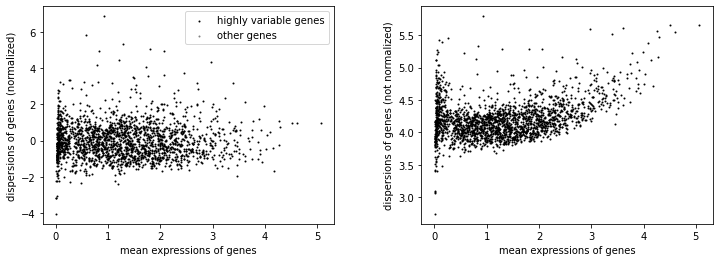

In [ ]:
sc.pl.highly_variable_genes(adataNC)

In [ ]:
adataNC = adataNC[:, adataNC.var.highly_variable]

In [ ]:
sc.pp.regress_out(adataNC, ['total_counts', 'pct_counts_mt', 'pct_counts_ribo'])

In [ ]:
sc.pp.scale(adataNC, max_value=10)

In [ ]:
sc.tl.pca(adataNC, svd_solver='arpack')

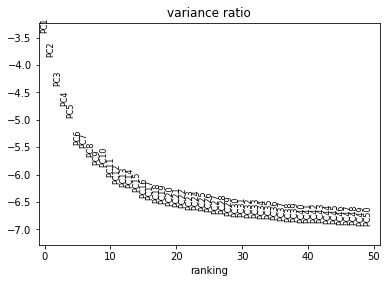

In [ ]:
sc.pl.pca_variance_ratio(adataNC, log=True, n_pcs = 50)

In [ ]:
sc.pp.neighbors(adataNC, n_pcs = 30)

In [ ]:

sc.tl.umap(adataNC)

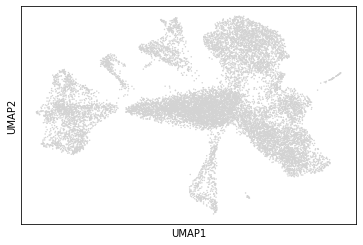

In [ ]:
sc.pl.umap(adataNC)

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 32.0 MB/s 
     |████████████████████████████████| 3.2 MB 59.0 MB/s 


In [ ]:
sc.tl.leiden(adataNC, resolution = 0.5)

In [ ]:
sc.tl.leiden(adataNC, resolution = 0.5)

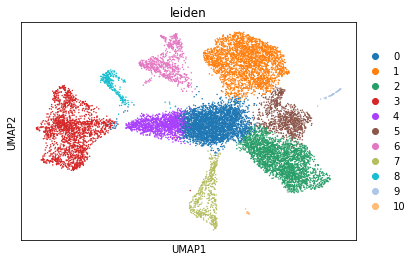

In [ ]:
sc.pl.umap(adataNC, color=['leiden'])

In [ ]:
def pp(csv_path):
    adata = sc.read_csv(csv_path).T
    sc.pp.filter_genes(adata, min_cells = 10)
    sc.pp.highly_variable_genes(adata, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adata)
    vae = scvi.model.SCVI(adata)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adata = sc.read_csv(csv_path).T
    adata.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    adata.obs['doublet'] = adata.obs.index.isin(doublets.index)
    adata = adata[~adata.obs.doublet]
    
    
    sc.pp.filter_cells(adata, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adata.var['mt'] = adata.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adata.var['ribo'] = adata.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adata, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adata.obs.n_genes_by_counts.values, .98)
    adata = adata[adata.obs.n_genes_by_counts < upper_lim]
    adata = adata[adata.obs.pct_counts_mt < 20]
    adata = adata[adata.obs.pct_counts_ribo < 2]

    return adata

In [ ]:
pp(/root/VV)

NameError: ignored

In [ ]:
ribo_url = "http://software.broadinstitute.org/gsea/msigdb/download_geneset.jsp?geneSetName=KEGG_RIBOSOME&fileType=txt"

In [ ]:
ribo_genes = pd.read_table(ribo_url, skiprows=2, header = None)
ribo_genes

NameError: ignored

In [ ]:
    adataNC = sc.read_10x_mtx(
    '/content/NC/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)
    #sc.pp.filter_genes(adataNC, min_cells = 10)
    sc.pp.highly_variable_genes(adataNC, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')

In [ ]:
    scvi.model.SCVI.setup_anndata(adataNC)
    vae = scvi.model.SCVI(adataNC)
    vae.train()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [10:38<00:00,  1.57s/it, loss=620, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [10:38<00:00,  1.60s/it, loss=620, v_num=1]


In [ ]:
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()

INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 278/400:  70%|██████▉   | 278/400 [07:40<03:22,  1.66s/it, loss=0.205, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.216. Signaling Trainer to stop.


In [ ]:
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adataNC = sc.read_10x_mtx(
    '/content/VV/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)
    #adataVV.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    
    adataNC.obs['doublet'] = adataNC.obs.index.isin(doublets.index)
    adataNC = adataNC[~adataNC.obs.doublet]
    
    
    #sc.pp.filter_cells(adataNC, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adataNC.var['mt'] = adataNC.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adataNC.var['ribo'] = adataNC.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adataNC, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adataNC.obs.n_genes_by_counts.values, .98)
    adataNC = adataNC[adataNC.obs.n_genes_by_counts < upper_lim]
    adataNC = adataNC[adataNC.obs.pct_counts_mt < 20]
    adataNC = adataNC[adataNC.obs.pct_counts_ribo < 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


In [ ]:
adataNC

View of AnnData object with n_obs × n_vars = 5905 × 36601
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
adataNC.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False,0,0.000000,100.000000,0.0
FAM138A,ENSG00000237613,Gene Expression,False,False,0,0.000000,100.000000,0.0
OR4F5,ENSG00000186092,Gene Expression,False,False,0,0.000000,100.000000,0.0
AL627309.1,ENSG00000238009,Gene Expression,False,False,22,0.003431,99.671789,23.0
AL627309.3,ENSG00000239945,Gene Expression,False,False,1,0.000149,99.985081,1.0
...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False,False,0,0.000000,100.000000,0.0
AC023491.2,ENSG00000278633,Gene Expression,False,False,1,0.000149,99.985081,1.0
AC007325.1,ENSG00000276017,Gene Expression,False,False,3,0.000448,99.955244,3.0
AC007325.4,ENSG00000278817,Gene Expression,False,False,3,0.000448,99.955244,3.0


In [ ]:
adataVV = sc.read_10x_mtx(
    '/content/VV/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)

In [ ]:
adataVV

View of AnnData object with n_obs × n_vars = 5321 × 36601
    obs: 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
    adataVV = sc.read_10x_mtx(
    '/content/VV/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)
    #sc.pp.filter_genes(adataVV, min_cells = 10)
    sc.pp.highly_variable_genes(adataVV, n_top_genes = 2000, subset = True, flavor = 'seurat_v3')
    scvi.model.SCVI.setup_anndata(adataVV)
    vae = scvi.model.SCVI(adataVV)
    vae.train()
    solo = scvi.external.SOLO.from_scvi_model(vae)
    solo.train()
    df = solo.predict()
    df['prediction'] = solo.predict(soft = False)
    df.index = df.index.map(lambda x: x[:-2])
    df['dif'] = df.doublet - df.singlet
    doublets = df[(df.prediction == 'doublet') & (df.dif > 1)]
    
    adataVV = sc.read_10x_mtx(
    '/content/VV/',  # the directory with the `.mtx` file
    var_names='gene_symbols',                # use gene symbols for the variable names (variables-axis index)
    cache=True)
    #adataVV.obs['Sample'] = csv_path.split('_')[2] #'raw_counts/GSM5226574_C51ctr_raw_counts.csv'
    adataVV.obs['doublet'] = adataVV.obs.index.isin(doublets.index)
    adataVV = adataVV[~adataVV.obs.doublet]
    #sc.pp.filter_cells(adataVV, min_genes=200) #get rid of cells with fewer than 200 genes
    #sc.pp.filter_genes(adata, min_cells=3) #get rid of genes that are found in fewer than 3 cells
    adataVV.var['mt'] = adataVV.var_names.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
    adataVV.var['ribo'] = adataVV.var_names.isin(ribo_genes[0].values)
    sc.pp.calculate_qc_metrics(adataVV, qc_vars=['mt', 'ribo'], percent_top=None, log1p=False, inplace=True)
    upper_lim = np.quantile(adataVV.obs.n_genes_by_counts.values, .98)
    adataVV = adataVV[adataVV.obs.n_genes_by_counts < upper_lim]
    adataVV = adataVV[adataVV.obs.pct_counts_mt < 20]
    adataVV = adataVV[adataVV.obs.pct_counts_ribo < 2]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [03:42<00:00,  1.81it/s, loss=549, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [03:42<00:00,  1.80it/s, loss=549, v_num=1]
INFO     Creating doublets, preparing SOLO model.                                                                  


/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 239/400:  60%|█████▉    | 239/400 [02:17<01:32,  1.74it/s, loss=0.291, v_num=1]
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.287. Signaling Trainer to stop.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:27: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.


In [ ]:
adataVV

View of AnnData object with n_obs × n_vars = 5288 × 36601
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo'
    var: 'gene_ids', 'feature_types', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

In [ ]:
adataVV.var

,gene_ids,feature_types,mt,ribo,n_cells_by_counts,mean_counts,pct_dropout_by_counts,total_counts
MIR1302-2HG,ENSG00000243485,Gene Expression,False,False,0,0.000000,100.000000,0.0
FAM138A,ENSG00000237613,Gene Expression,False,False,0,0.000000,100.000000,0.0
OR4F5,ENSG00000186092,Gene Expression,False,False,0,0.000000,100.000000,0.0
AL627309.1,ENSG00000238009,Gene Expression,False,False,18,0.003143,99.702233,19.0
AL627309.3,ENSG00000239945,Gene Expression,False,False,1,0.000165,99.983457,1.0
...,...,...,...,...,...,...,...,...
AC141272.1,ENSG00000277836,Gene Expression,False,False,0,0.000000,100.000000,0.0
AC023491.2,ENSG00000278633,Gene Expression,False,False,1,0.000165,99.983457,1.0
AC007325.1,ENSG00000276017,Gene Expression,False,False,3,0.000496,99.950372,3.0
AC007325.4,ENSG00000278817,Gene Expression,False,False,1,0.000165,99.983457,1.0


In [ ]:
out = []

In [ ]:
out.append(adataNC)

In [ ]:
out.append(adataVV)

In [ ]:
adata = sc.concat(out)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
sc.pp.filter_genes(adata, min_cells = 10)

In [ ]:
adata

AnnData object with n_obs × n_vars = 11193 × 36601
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Sample'

In [ ]:
adata.X

<11228x24243 sparse matrix of type '<class 'numpy.float32'>'
	with 17007840 stored elements in Compressed Sparse Row format>

In [ ]:
adataNC.obs['Sample'] = 'NC'
adataVV.obs['Sample'] = 'VV'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  


In [ ]:
from scipy.sparse import csr_matrix

In [ ]:
adata.X = csr_matrix(adata.X)

In [ ]:
adata.write_h5ad('combined.h5ad')

In [ ]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
adata = sc.read_h5ad('combined.h5ad')
adata

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


AnnData object with n_obs × n_vars = 11193 × 36601
    obs: 'doublet', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Sample'

In [ ]:
adata.obs.groupby('Sample').count()

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo
Sample,,,,,,,
NC,5905,5905,5905,5905,5905,5905,5905
VV,5288,5288,5288,5288,5288,5288,5288


In [ ]:
sc.pp.filter_genes(adata, min_cells = 100)

/usr/local/lib/python3.7/dist-packages/anndata/_core/anndata.py:1828: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [ ]:
adata

AnnData object with n_obs × n_vars = 11228 × 15442
    obs: 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', 'Sample'
    var: 'n_cells'

In [ ]:
adata.layers['counts'] = adata.X.copy()

In [ ]:
sc.pp.normalize_total(adata, target_sum = 1e4)
sc.pp.log1p(adata)
adata.raw = adata

In [ ]:
adata.obs.head()

,doublet,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,Sample
AAACCCACAAAGGGCT-1,False,90,100.0,0.0,0.000000,0.0,0.000000,NC
AAACCCACAAGGAGTC-1,False,185,318.0,24.0,7.547170,4.0,1.257862,NC
AAACCCACAAGGTACG-1,False,242,531.0,4.0,0.753296,7.0,1.318267,NC
AAACCCACACCTCGTT-1,False,243,590.0,9.0,1.525424,3.0,0.508475,NC
AAACCCACATCATCCC-1,False,203,625.0,26.0,4.160000,9.0,1.440000,NC


In [ ]:
scvi.model.SCVI.setup_anndata(adata, layer = "counts",
                             categorical_covariate_keys=["Sample"],
                             continuous_covariate_keys=['pct_counts_mt', 'total_counts', 'pct_counts_ribo'])

In [ ]:
model = scvi.model.SCVI(adata)

In [ ]:
model.train()

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Epoch 400/400: 100%|██████████| 400/400 [16:21<00:00,  2.46s/it, loss=4.84e+03, v_num=1]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=400` reached.


Epoch 400/400: 100%|██████████| 400/400 [16:21<00:00,  2.45s/it, loss=4.84e+03, v_num=1]


In [ ]:
adata.obsm['X_scVI'] = model.get_latent_representation()

In [ ]:
adata.layers['scvi_normalized'] = model.get_normalized_expression(library_size = 1e4)

In [ ]:
sc.pp.neighbors(adata, use_rep = 'X_scVI')

In [ ]:
!pip install leidenalg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 35.6 MB/s 
     |████████████████████████████████| 3.2 MB 56.8 MB/s 


In [ ]:
pip install matplotlib==3.1.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 27.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.9.1 requires matplotlib>=3.4, but you have matplotlib 3.1.3 which is incompatible.


In [ ]:
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution = 0.5)

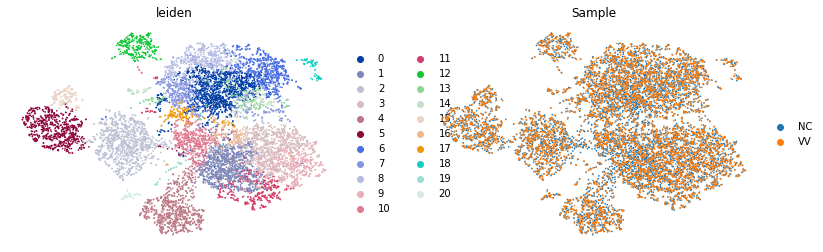

In [ ]:
sc.pl.umap(adata, color = ['leiden', 'Sample'], frameon = False)

In [ ]:
adata.write_h5ad('integrated.h5ad')

In [ ]:
sc.tl.leiden(adata, resolution = 1)

In [ ]:
sc.tl.rank_genes_groups(adata, 'leiden')

/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/local/lib/python3.7/dist-packages/scanpy/tools/_rank_genes_groups.py:399: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

In [ ]:
markers = sc.get.rank_genes_groups_df(adata, None)
markers = markers[(markers.pvals_adj < 0.05) & (markers.logfoldchanges > .5)]
markers

,group,names,scores,logfoldchanges,pvals,pvals_adj
0,0,CD74,34.933685,4.677920,2.382093e-157,2.812484e-154
1,0,HLA-DPB1,27.805162,4.938614,8.361622e-116,3.477770e-113
2,0,CIITA,27.541380,5.719519,4.608124e-114,1.833282e-111
3,0,DOCK4,26.239407,3.379465,7.260115e-108,2.393941e-105
4,0,HLA-DRB1,25.230431,4.191752,5.019619e-101,1.341044e-98
...,...,...,...,...,...,...
1428093,39,AL136456.1,2.334142,3.689778,2.421448e-02,4.884128e-02
1428094,39,SLF1,2.333956,1.801258,2.421580e-02,4.884128e-02
1428095,39,MAPKAPK3,2.330582,3.728980,2.442055e-02,4.924338e-02
1428096,39,TNFRSF25,2.329390,2.389674,2.448414e-02,4.936617e-02


In [ ]:
markers_scvi = model.differential_expression(groupby = 'leiden')
markers_scvi

DE...: 100%|██████████| 40/40 [10:26<00:00, 15.66s/it]


,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,...,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05,comparison,group1,group2
CIITA,0.9972,0.0028,5.875328,9.876732e-04,4.037214e-05,0.0,0.25,5.629411,5.659300,2.246990,...,1.967286,0.053861,0.583215,0.038036,9.595586,0.229273,True,0 vs Rest,0,Rest
AC110760.2,0.9954,0.0046,5.377086,1.024494e-07,5.814716e-06,0.0,0.25,-13.545203,-14.049321,7.752424,...,0.000000,0.008866,0.000000,0.007626,0.000000,0.037734,True,0 vs Rest,0,Rest
SIGLEC7,0.9952,0.0048,5.334326,3.746254e-05,3.783839e-07,0.0,0.25,10.578190,10.223240,6.202526,...,0.034139,0.000286,0.031294,0.000286,0.278742,0.001308,True,0 vs Rest,0,Rest
AC133065.1,0.9950,0.0050,5.293303,3.867933e-04,1.140477e-05,0.0,0.25,7.911068,7.793595,3.766069,...,0.657183,0.006387,0.362731,0.004957,3.393711,0.031958,True,0 vs Rest,0,Rest
HLA-DPB1,0.9948,0.0052,5.253881,6.675252e-04,4.263113e-05,0.0,0.25,4.358233,4.373062,1.671729,...,1.621624,0.074071,0.598862,0.059962,7.441972,0.349469,True,0 vs Rest,0,Rest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SCAF11,0.6068,0.3932,0.433881,2.237660e-04,2.257407e-04,0.0,0.25,0.039317,0.028803,0.579271,...,0.511111,0.663900,0.377778,0.405544,2.570115,2.440564,False,39 vs Rest,39,Rest
ARGLU1,0.5944,0.4056,0.382185,3.673834e-04,4.302253e-04,0.0,0.25,-0.186233,-0.202295,0.435825,...,0.533333,1.391871,0.333333,0.607643,2.954233,4.802242,False,39 vs Rest,39,Rest
KANSL1,0.5494,0.4506,0.198247,3.976094e-04,4.093001e-04,0.0,0.25,-0.015834,-0.046412,0.440177,...,1.111111,1.266218,0.577778,0.547094,6.041806,4.403944,False,39 vs Rest,39,Rest
DDX17,0.5196,0.4804,0.078440,5.049082e-04,4.688477e-04,0.0,0.25,0.126838,0.120500,0.406088,...,1.266667,1.497614,0.777778,0.644421,9.036286,5.348262,False,39 vs Rest,39,Rest


In [ ]:
markers_scvi = markers_scvi[(markers_scvi['is_de_fdr_0.05']) & (markers_scvi.lfc_mean > .5)]

In [ ]:
sc.pl.umap(adata, color = ['leiden'], frameon = False, legend_loc = "on data")

NameError: ignored

TypeError: ignored

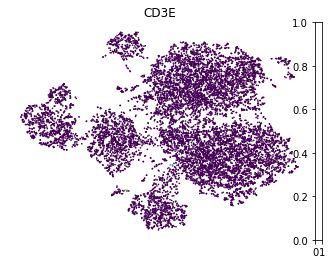

In [ ]:
sc.pl.umap(adata, color =['CD3E'], frameon = False, layer = 'scvi_normalized')

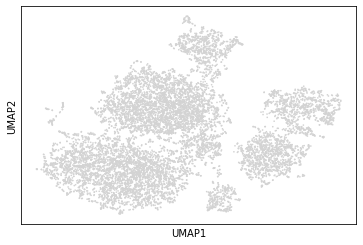

In [ ]:
sc.pl.umap(adata)